# CZSa 2024 Homework 1

## Instructions

You are allowed to collaborate and to use information from slides, books, internet etc., for solving this homework. HOWEVER, in the final exam, there will be some questions that are very similar to some questions of this homework and/or the next homework. These questions can give ten (10) points in total on the exam. Therefore, it is beneficial for you to understand the answers you provide here.

Deadline 2024-12-16 by email. Please include any code you have written either, separately or as verbatim text in the report.

Please don't hestitate to ask if something is unclear.

```
Author: Erika Do (xdoeri00)
```

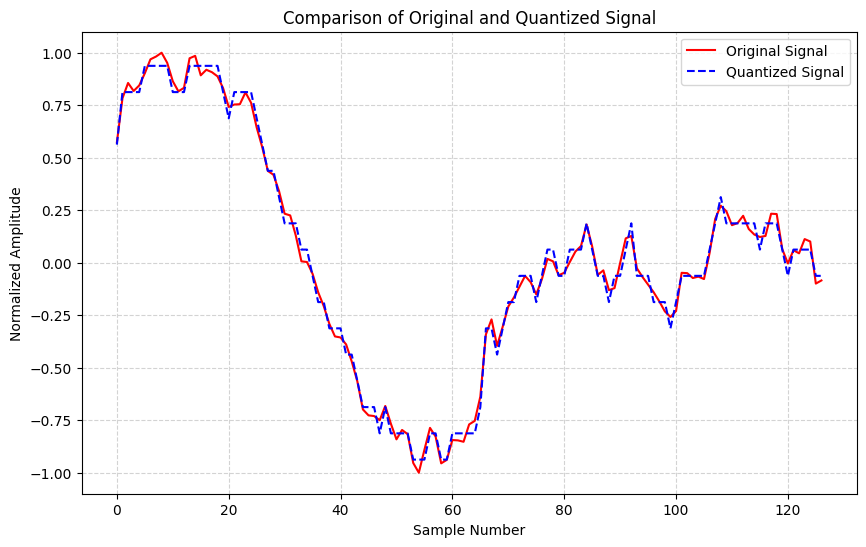

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy import signal

def normalize(x):
    return 2 * (x - np.min(x)) / (np.max(x) - np.min(x)) - 1, np.max(x), np.min(x)

def quantize(y, b=8):
    q = 2 / (b**2)
    return np.min((q * (np.floor(y / q) + 0.5), (1 - q / 2) * np.ones_like(y)), axis=0);

filename="./00011.wav"
r, sgn = scipy.io.wavfile.read(filename)
sgn=sgn.astype("int32")

sgn, _, _ = normalize(sgn)
bit = 4
sgn_q = sgn[0:127]
sgn_q, _, _ = normalize(sgn_q)

plt.figure(figsize=(10, 6))
plt.plot(sgn_q, 'r', label='Original Signal')
plt.plot(quantize(sgn_q, bit), 'b--', label='Quantized Signal')
plt.xlabel('Sample Number')
plt.ylabel('Normalized Amplitude')
plt.title('Comparison of Original and Quantized Signal')
plt.legend()
plt.grid(True, linestyle='--', color='lightgray')

## 1 (3p)

### a)
Calculate numerically the SNR resulting from quantization of a real signal. For example, you can use the speech recording ```00011.wav``` available in the github repository. Plot the SNR vs the number of bits, e.g., for $\# \rm{bit}s=2,3,4,5,6,7,8$. \
You can use the functions ```quantize```, ```normalize``` and other code pieces from Exercise 1.

In [2]:
# 1a)
bits = [2, 3, 4, 5, 6, 7, 8]
snr = []

for bit in bits:
    y1 = sgn
    y2 = quantize(y1, bit)
    signal_energy = np.sum(y1**2)
    noise_energy  = np.sum((y1 - y2)**2)
    snr.append(10 * np.log10(signal_energy / noise_energy))

snr = np.array(snr)

### b)
Compare the plot to the two results for SNR we derived in Lecture 1, i.e.,
\begin{equation}
SNR_{\rm{sine}}=6.02b + 1.67\,\,dB
\end{equation}
and
\begin{equation}
SNR_{\rm{uniform}}=6.02b\,\,dB
\end{equation}
where $SNR_{\rm{sine}}$ and $SNR_{\rm{uniform}}$ refers to the case of a sine signal and a uniformly distributed signal respectively (one example of a uniformly distributed signal is the sawtooth signal [https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html)). In both formulas, $b$ is the number of bits used for the quantization. For both formulas, the error is assumed to be uniformly distributed in $[-q/2, q/2]$ where $q$ is the quantiztion step, i.e., the difference of two adjecent quantiztion levels.

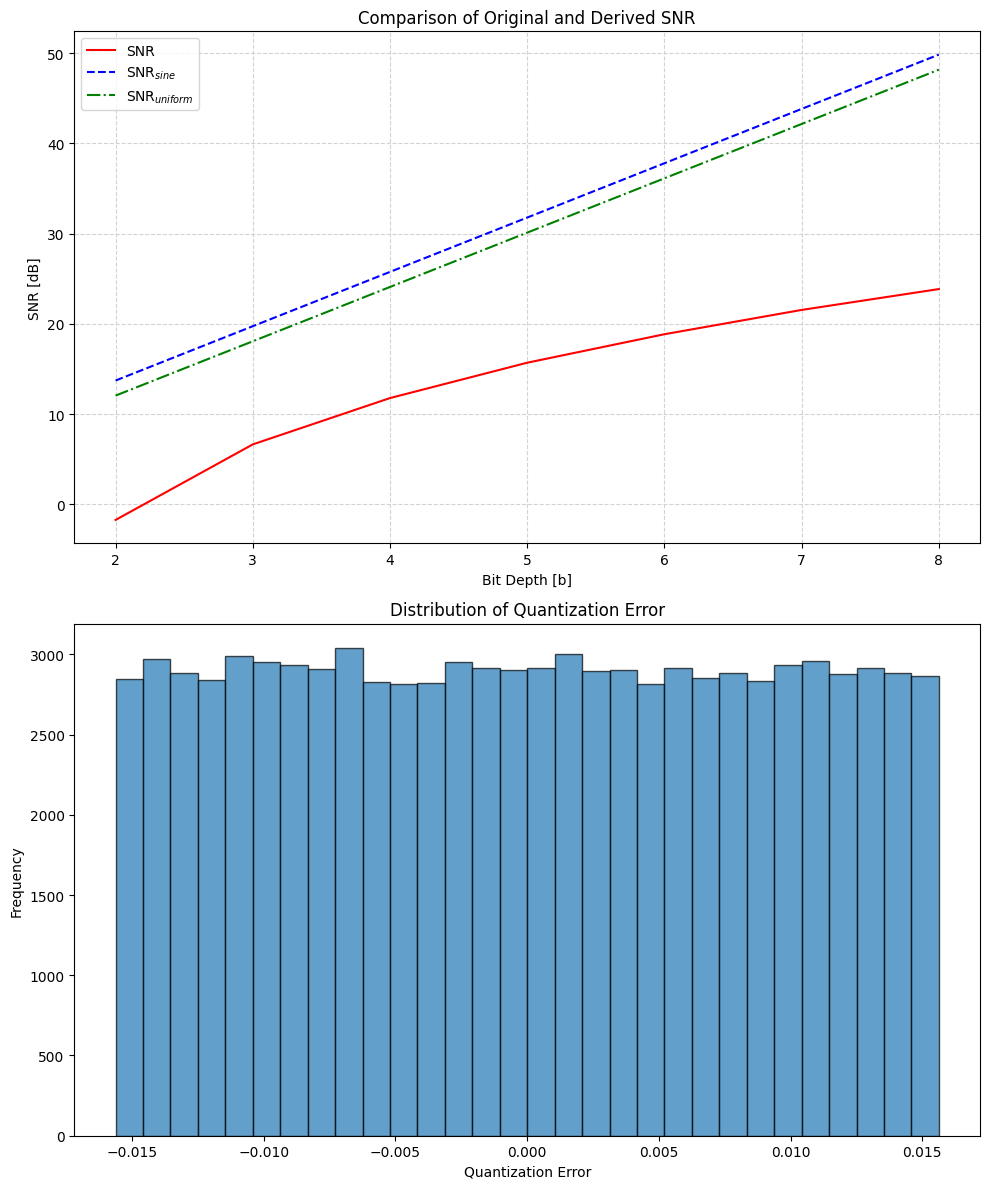

In [19]:
# 1b)
bits_np = np.array([2, 3, 4, 5, 6, 7, 8])
snr_sine = 6.02 * bits_np + 1.67
snr_uniform = 6.02 * bits_np

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].plot(bits, snr, 'r', label='SNR')
ax[0].plot(bits, snr_sine, 'b--', label=r'$\text{SNR}_{sine}$')
ax[0].plot(bits, snr_uniform, 'g-.', label=r'$\text{SNR}_{uniform}$')
ax[0].set_xlabel('Bit Depth [b]')
ax[0].set_ylabel('SNR [dB]')
ax[0].set_title('Comparison of Original and Derived SNR')
ax[0].legend()
ax[0].grid(True, linestyle='--', color='lightgray')

q_error = sgn - quantize(sgn, 8)
ax[1].hist(q_error, bins=30, edgecolor='black', alpha=0.7)
ax[1].set_title('Distribution of Quantization Error')
ax[1].set_xlabel('Quantization Error')
ax[1].set_ylabel('Frequency')

plt.tight_layout()

# The result meets expectations: as the number of bits in quantization increases, the error decreases, resulting in an improved SNR.
# The red line shows the SNR increasing non-linearly with bit depth. At lower bit depths, the SNR rises steeply, but the curve flattens at higher bit depths, indicating diminishing returns. This suggests the error might not be uniformly distributed or other system limitations affect the SNR.
# The second graph shows that the error distribution is not perfectly uniform but gradually converges toward uniformity.

### c)
Analyse how accurate the assumptions for the above two formulas are for the signal you used. The assumptions about uniform distributions can be analaysed for example by plotting histograms. The assumptions about the signal being a pure sine or cosine signal can be checked by calculating DFT and plotting the spectrum.  

Text(0.5, 1.0, 'Histogram of Signal Amplitude')

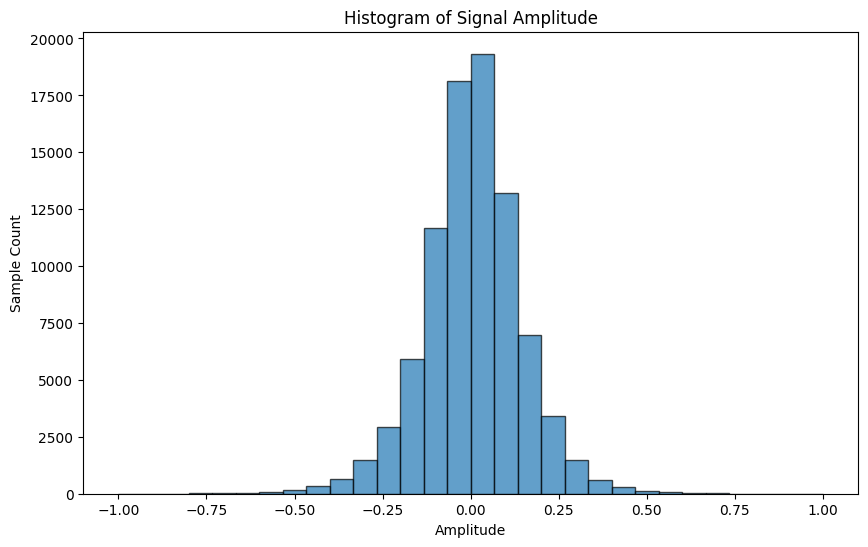

In [20]:
# 1c
plt.figure(figsize=(10, 6))
plt.hist(sgn, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Amplitude')
plt.ylabel('Sample Count')
plt.title('Histogram of Signal Amplitude')

# The number of bits does not affect the accuracy of the two signal formulas.
# The bell-shaped histogram suggests that the signal’s amplitudes are approximately normally distributed,
# with most values concentrated around the mean, indicating that the distribution is not uniform.

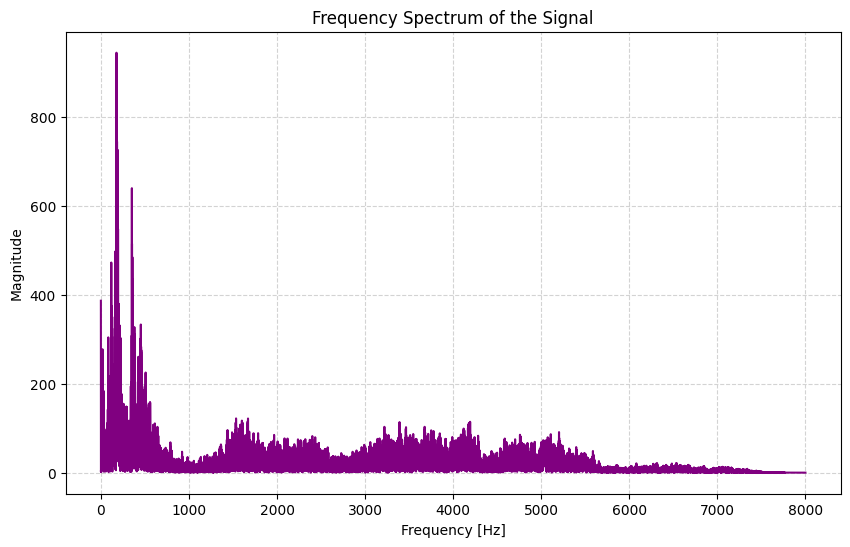

In [5]:
dft = np.fft.fft(sgn)
freqs = np.fft.fftfreq(len(sgn), d=(1 / r))
length = lambda x: len(x) // 2

plt.figure(figsize=(10, 6))
plt.plot(freqs[:length(freqs)], np.abs(dft[:length(dft)]), color='purple', label='Magnitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum of the Signal')
plt.grid(True, linestyle='--', color='lightgray')

# If the signal is a pure sine or cosine, its DFT will show a single peak at the corresponding frequency, with the rest of the spectrum being zero (or close to zero).
# In the image, multiple peaks are visible, indicating that the signal consists of several sine waves.

## 2 (2p)
Recall from Lecture 1 that if a signal is sampled with sampling frequency $F_s$ and before sampling contained only frequencies below $F_s/2$ then it can be reconstructed according to
\begin{equation}
f(t)=\sum_{n=-\infty}^{\infty} f\left(\frac{n}{F_s} \right )\frac{\sin(tF_s\pi -n\pi)}{tF_s\pi -n\pi}\quad (1),
\end{equation}
where $f\left(\frac{n}{F_s} \right )= f\left(nT_s \right )$ is the signal values at the sampling points ($F_s=1/T_s$).
### a)
Downsample (decimate) the signal used before with a factor 4 using the appropriate anti-aliasing filter. That is, if your original signal is in 16KHz (and accordingly has already been filtered so that it only contains frequencies below 8KHz) you

1. Create a low pass filter with cut off frequency 2KHz (you can use code snippets from exercise 4 based on ```scicpy.signal``` for this) and send the signal through the filter. Denote the obtained signal $x[n]$.
2. Discard 3 out of four samples, i.e., you keep every fourth sample of the signal. This can be written as $x_{\rm{d}}[n]=x[4n]$ where the left hand side is the downsampled signal and the right hand side is the original signal after anti-alias filtering.

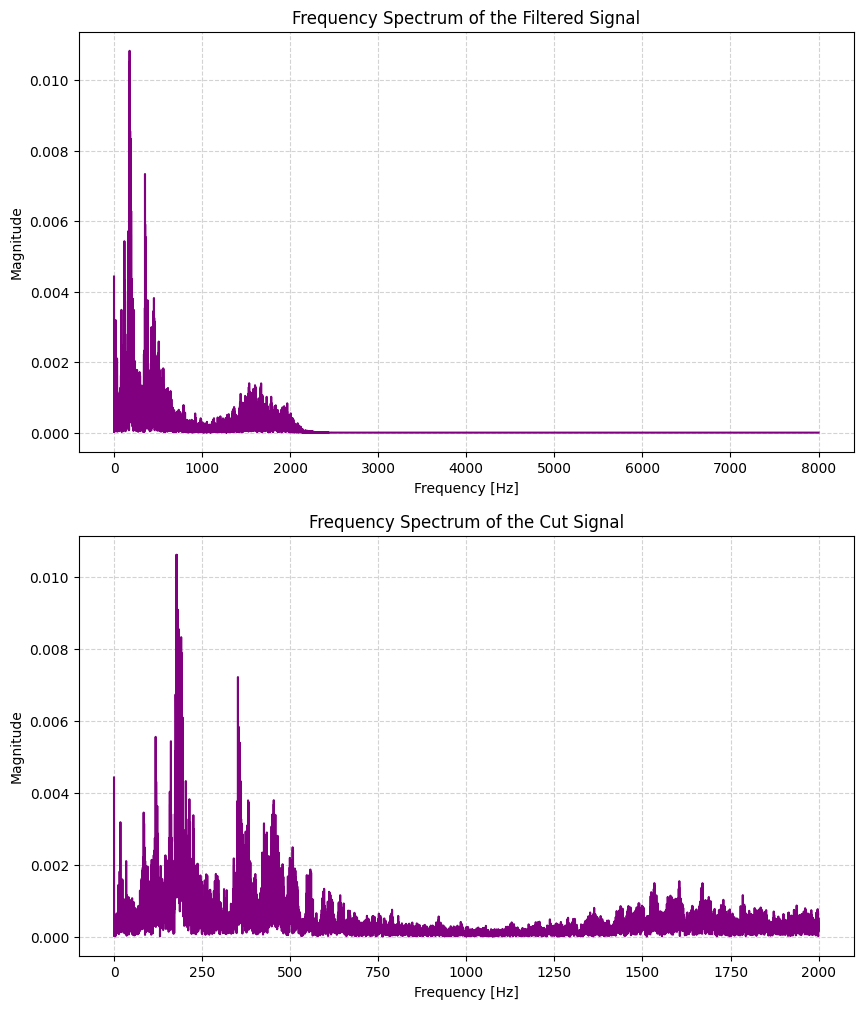

In [21]:
# 2a) 1.
order = 25
sampling_freq = 16000
cutoff_freq = 2000

numerator_coeffs, denominator_coeffs = scipy.signal.butter(order, cutoff_freq, analog=False, fs=sampling_freq)
sgn_f = scipy.signal.lfilter(numerator_coeffs, denominator_coeffs, sgn)
sgn_cut = sgn_f[::4]

l = np.shape(sgn_f)[0]
f = np.fft.fft(sgn_f)
fs = np.fft.fftshift(f)
w = np.arange(0, l/2) / l * sampling_freq

l_cut = np.shape(sgn_cut)[0]
f_cut = np.fft.fft(sgn_cut)
fs_cut = np.fft.fftshift(f_cut)
w_cut = np.arange(0, l_cut/2) / l_cut * (sampling_freq / 4)

fig, ax = plt.subplots(2, 1, figsize=(10, 12))

ax[0].plot(w, np.abs(fs[len(fs)//2:]) / l, color='purple')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Magnitude')
ax[0].set_title('Frequency Spectrum of the Filtered Signal')
ax[0].grid(True, linestyle='--', color='lightgray')

ax[1].plot(w_cut, np.abs(fs_cut[len(fs_cut)//2:]) / l_cut, color='purple')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Magnitude')
ax[1].set_title('Frequency Spectrum of the Cut Signal')
ax[1].grid(True, linestyle='--', color='lightgray')

### b)
Use Equation (1) above to reconstruct some values of the original signal, $x[n]$, that are not part of $x_{\rm{d}}[n]$, e.g. $x[4n+2]$. Of of course, you need to replace the infinite limits in the sum with finite ones. It is a good idea to take equally many on each side of the point of interest. Try briefly how many you seem to need for accurate results. You don't need to analyse this deeply.
Compare the result to the correct values as well as the ones obtained by simple linear interpolation of the two surrounding points, i.e.,
\begin{equation}
\frac{x_{\rm{d}}[n] + x_{\rm{d}}[n+1]}{2}=\frac{x[4n] + x[4(n+1)]}{2}
\end{equation}.

In [7]:
# 2b)
N = 32
num_of_reconstructed_samples = 3

def sinc_interpolation(t, sgn, fs, max_samples):
    index = int(np.round(t * fs))
    half_interval = max_samples // 2
    left_limit = max(0, index - half_interval)
    right_limit = min(len(sgn), index + half_interval)

    samples_used = min(index - left_limit, right_limit - index)
    i = np.arange(index - samples_used, index + samples_used)

    return np.sum(sgn[i] * np.sinc(t * fs - i))

# samples from cut signal + reconstructed samples * number of samples - 1 (no new samples after last original)
length_rec_sgn = len(sgn_cut) + (num_of_reconstructed_samples * (len(sgn_cut) - 1))

sample_times = np.linspace(0, len(sgn_cut) / r, length_rec_sgn)
sgn_rec = np.array([sinc_interpolation(t, sgn_cut, r, N) for t in sample_times])

full_indices = np.arange(0, length_rec_sgn)
cut_indices = full_indices[::num_of_reconstructed_samples + 1]
sgn_linear = np.interp(full_indices, cut_indices, sgn_cut)

# Too few samples lead to greater distortion in the reconstructed signal.
# The distortion appears to become negligible at 32 samples. To ensure accuracy, 32 samples are chosen.
# Increasing the number of samples beyond this does not seem to further reduce distortion, at least as observed in the plotted graph.

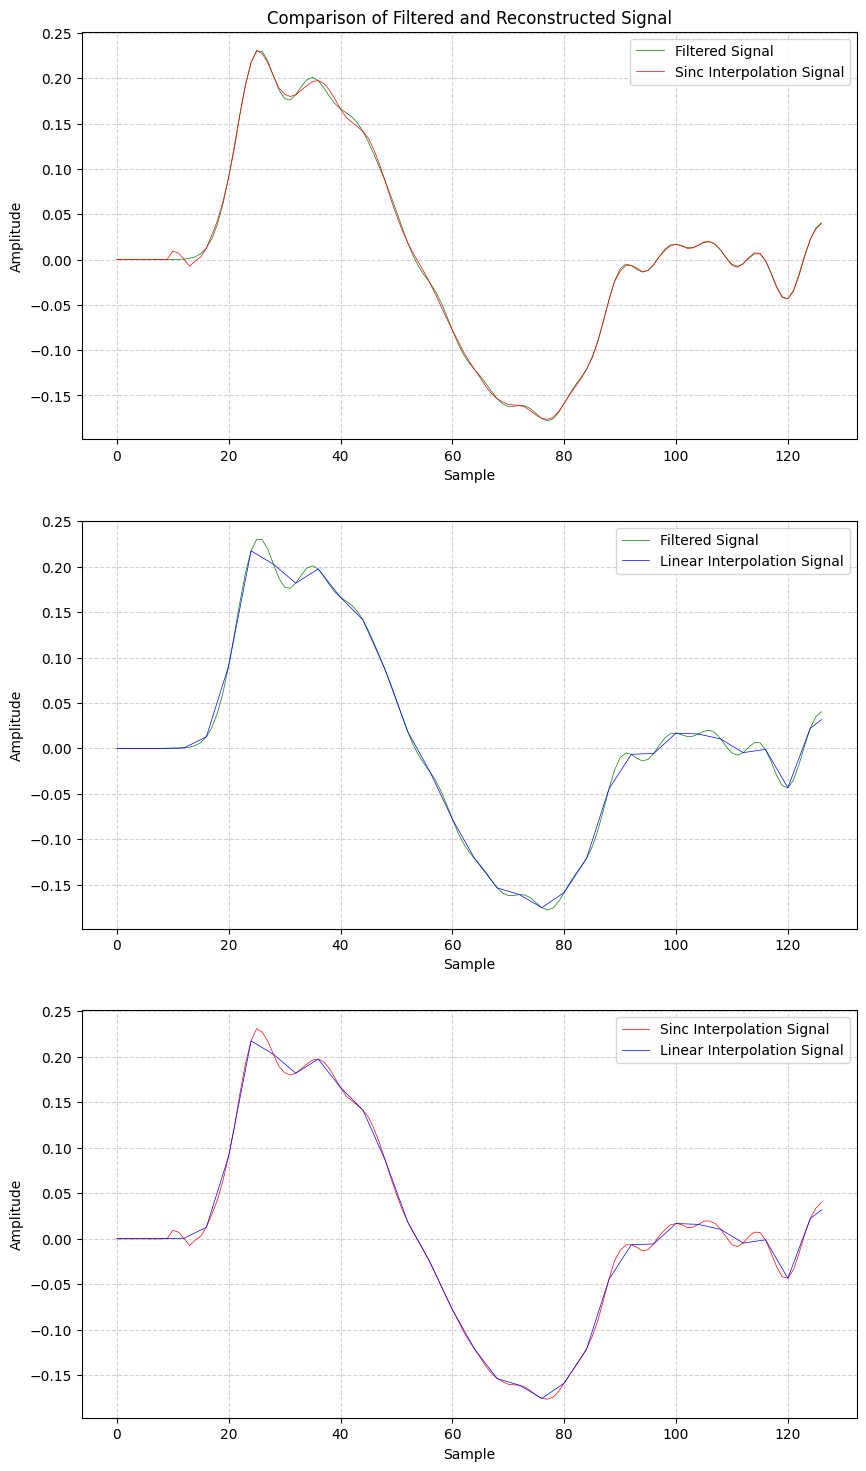

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

ax[0].plot(sgn_f[:127], label='Filtered Signal', color='g', linewidth=0.5)
ax[0].plot(sgn_rec[:127], label='Sinc Interpolation Signal', color='r', linewidth=0.5)
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Comparison of Filtered and Reconstructed Signal')
ax[0].legend()
ax[0].grid(True, linestyle='--', color='lightgray')

ax[1].plot(sgn_f[:127], label='Filtered Signal', color='g', linewidth=0.5)
ax[1].plot(sgn_linear[:127], label='Linear Interpolation Signal', color='b', linewidth=0.5)
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Amplitude')
ax[1].legend()
ax[1].grid(True, linestyle='--', color='lightgray')

ax[2].plot(sgn_rec[:127], label='Sinc Interpolation Signal', color='r', linewidth=0.5)
ax[2].plot(sgn_linear[:127], label='Linear Interpolation Signal', color='b', linewidth=0.5)
ax[2].set_xlabel('Sample')
ax[2].set_ylabel('Amplitude')
ax[2].legend()
ax[2].grid(True, linestyle='--', color='lightgray')

## 3 (2p)
Show that a symmetric FIR filter with with odd number of real coefficients has linear phase. Here, antisymmetric means the filter coefficients fulfill
\begin{equation}
h[N-n]=h[N+n]
\end{equation}
where $N$ and $n$ are postitive integers, $n\leq N$ and the filter has length $2N+1$. (See slides of lecture 4 for a figure.)

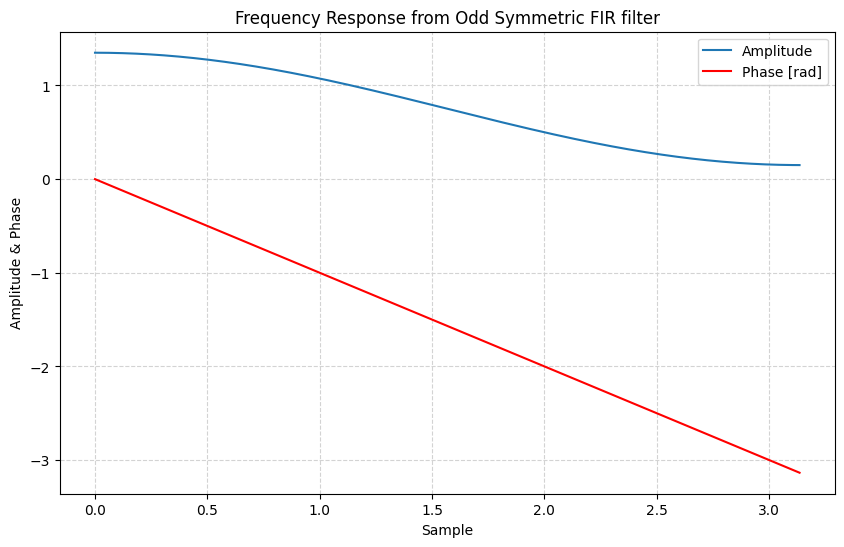

In [23]:
# 3)
numerator   = np.array([0.3, 0.75, 0.3])
denominator = np.array([1])

w1, Hw1 = scipy.signal.freqz(numerator, denominator)

plt.figure(figsize=(10, 6))
plt.plot(w1, np.abs(Hw1), label='Amplitude')
plt.plot(w1, np.angle(Hw1), 'r', label='Phase [rad]')
plt.xlabel('Sample')
plt.ylabel('Amplitude & Phase')
plt.title('Frequency Response from Odd Symmetric FIR filter')
plt.legend()
plt.grid(True, linestyle='--', color='lightgray')

The filter's frequency response, denoted as $H(e^{j\omega})$, is given by:

\begin{equation}
H(e^{j\omega}) = \sum_{k=-\infty}^{\infty} h[k] e^{-j\omega k}.
\end{equation}

In the case of a finite impulse response (FIR) filter with length of $2N+1$, the coefficients $h[k]$ are nonzero exclusively for $k$ values in the range ${-N, -(N-1), \dots, 0, \dots, N-1, N}$. This leads to a discrete-time Fourier transform (DTFT) expression:

\begin{equation} H(e^{j\omega}) = \sum_{k=-N}^{N} h[k] e^{-j\omega k}. \end{equation}

The symmetry property of the filter's impulse response is now applied, defined as $h[N-n] = h[N+n]$. This indicates that the filter's coefficients are symmetric around the midpoint $N$. This symmetry helps simplify the expression for the frequency response. The summation then split into two parts by splitting it at $k = 0$, resulting in:

\begin{equation}
H(e^{j\omega}) = \sum_{n=0}^{N} h[N-n] e^{-j\omega (N-n)} + \sum_{n=0}^{N} h[N+n] e^{-j\omega (N+n)}.
\end{equation}

- The first term represents the part of the sum for negative $k$ values, specifically for $k = N-n$, where $n$ ranges from $0$ to $N$.
- The second term corresponds to the positive $k$ values, particularly when $k = N+n$, with $n$ also ranging from $0$ to $N$.

By applying the symmetry property $h[N-n] = h[N+n]$, the two sums can be simplified. Since both terms share the same coefficient $h[N-n] = h[N+n]$, the summations are identical and can therefore be merged into one:

\begin{equation}
H(e^{j\omega}) = \sum_{n=0}^{N} h[N-n] \left( e^{-j\omega (N-n)} + e^{-j\omega (N+n)} \right).
\end{equation}

Next, simplify the expressions inside the parentheses:

\begin{equation}
e^{-j\omega (N-n)} + e^{-j\omega (N+n)} = e^{-j\omega N} \left( e^{j\omega n} + e^{-j\omega n} \right).
\end{equation}

The expression $e^{j\omega n} + e^{-j\omega n}$ simplifies to $2\cos(\omega n)$. Substituting this result yields:

\begin{equation}
H(e^{j\omega}) = \sum_{n=0}^{N} h[N-n] e^{-j\omega N} \cdot 2\cos(\omega n).
\end{equation}

Factor out the term $e^{-j\omega N}$ from the summation:

\begin{equation}
H(e^{j\omega}) = e^{-j\omega N} \cdot \sum_{n=0}^{N} 2 h[N-n] \cos(\omega n).
\end{equation}

- The factor $e^{-j\omega N}$ is extracted from the summation because it appears in each term of the sum.
- The remaining expression inside the sum is $2 h[N-n] \cos(\omega n)$, after simplifying the two exponential terms to $2 \cos(\omega n)$.

The frequency response $H(e^{j\omega})$ can be
now expressed as:

\begin{equation}
H(e^{j\omega}) = e^{-j\omega N} \cdot \text{(real term)}.
\end{equation}

The phase of $H(e^{j\omega})$ is entirely determined by the term $e^{-j\omega N}$, which gives:

\begin{equation}
\text{Phase of } H(e^{j\omega}) = -\omega N.
\end{equation}

Since the phase varies linearly with $\omega$, this confirms that the FIR filter exhibits linear phase.